In [1]:
import numpy as np
from matplotlib import pyplot as plt

Система
x' = y, y' = x^2 - 1
(1,0) and (-1,0)
x(0) = ? y(0) = ?

In [2]:
# Определяем систему ОДУ
def f(x, y):
    return y  # dx/dt = y

def g(x, y):
    return x**2 - 1  # dy/dt = x² - 1

# Параметры решения
t0 = 0.0
x0 = 0.0
y0 = 1.0
h = 0.1
steps = 1000

In [3]:
def plot(arr_x, arr_y):
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.plot(arr_x, 'b-', label='x(t)')
    plt.xlabel('Время t')
    plt.ylabel('x(t)')
    plt.title('Решение для x(t)')
    plt.grid(True)
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(arr_y, 'r-', label='y(t)')
    plt.xlabel('Время t')
    plt.ylabel('y(t)')
    plt.title('Решение для y(t)')
    plt.grid(True)
    plt.legend()
    plt.show()

In [4]:
# 4 порядок

y_n = -1
x_n = 0
def runge_kutta_4(x_n, y_n, h):
    yks = np.array([], dtype = float)
    xks = np.array([], dtype = float)

    yks = np.append(yks, y_n)
    xks = np.append(xks, x_n)

    for n in range(steps):
        k_1 = h*y_n
        L_1 = h*(x_n*x_n - 1)
        k_2 = h*(y_n + 0.5*L_1)
        L_2 = h*((x_n+0.5*k_1)*(x_n+0.5*k_1) - 1)
        k_3 = h*(y_n + 0.5*L_2)
        L_3 = h*((x_n + 0.5*k_2)*(x_n + 0.5*k_2) - 1)
        k_4 = h*(y_n + L_3)
        L_4 = h*((x_n + k_3)*(x_n + k_3) - 1)
        x_n = x_n + (k_1 + 2*k_2 + 2*k_3 + k_4) / 6
        y_n = y_n + (L_1 + 2*L_2 + 2*L_3 + L_4) / 6
        yks = np.append(yks, y_n)
        xks = np.append(xks, x_n)
    return xks, yks




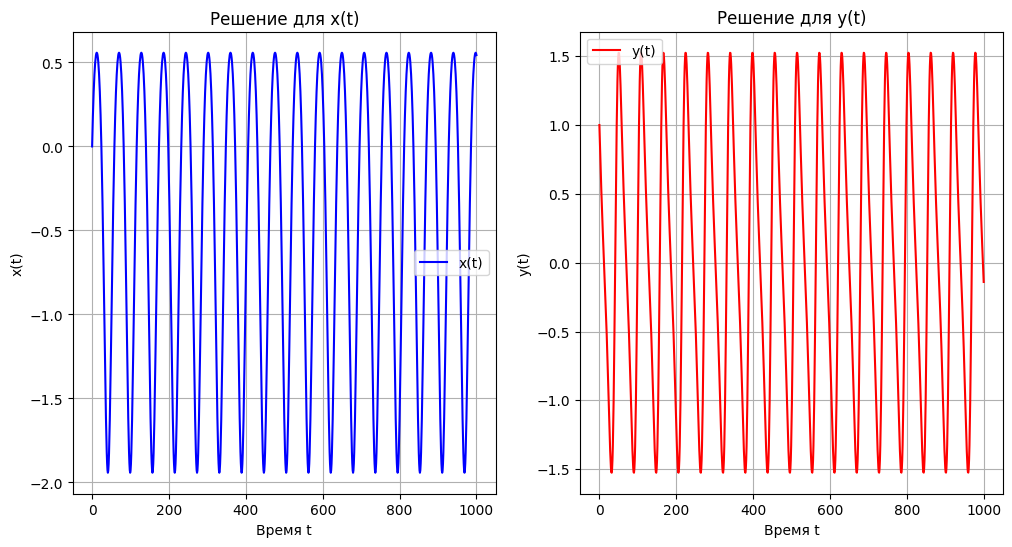

In [53]:
_, yks = runge_kutta_4(x0, y0, h)

plot(_, yks)

In [54]:
# 3 порядок

def runge_kutta_3(x_n, y_n, h):
    yks = np.array([], dtype = float)
    xks = np.array([], dtype = float)

    yks = np.append(yks, y_n)
    xks = np.append(xks, x_n)
    for n in range(steps):
        k_1 = h*y_n
        L_1 = h*(x_n*x_n - 1)
        k_2 = h*(y_n + 0.5*L_1)
        L_2 = h*((x_n+0.5*k_1)*(x_n+0.5*k_1) - 1)
        k_3 = h*(y_n + 2*L_2 - L_1)
        L_3 = h*((x_n +2*k_2 - k_1)*(x_n +2*k_2 - k_1) - 1)

        x_n = x_n + (k_1 + 4*k_2 + k_3) / 6
        y_n = y_n + (L_1 + 4*L_2 + L_3) / 6
        yks = np.append(yks, y_n)
        xks = np.append(xks, x_n)
    return xks, yks



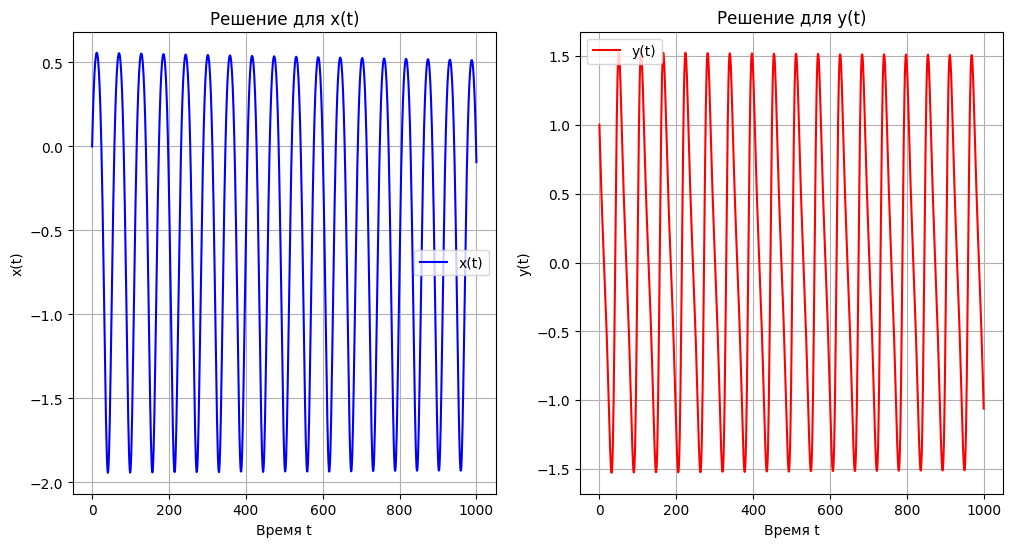

In [55]:
_, yks = runge_kutta_3(x0, y0, h)

plot(_, yks)

In [56]:
# 2 порядок

def runge_kutta_2(x_n, y_n, h):
    yks = np.array([], dtype = float)
    xks = np.array([], dtype = float)

    yks = np.append(yks, y_n)
    xks = np.append(xks, x_n)
    for n in range(steps):
        k_1 = h * y_n
        l_1 = h * (x_n*x_n - 1)
        k_2 = h * (y_n + l_1)
        l_2 = h * ((x_n+k_1)*(x_n+k_1) - 1)

        x_n = x_n + (k_1 + k_2) / 2
        y_n = y_n + (l_1 + l_2) / 2
        yks = np.append(yks, y_n)
        xks = np.append(xks, x_n)
    return xks, yks



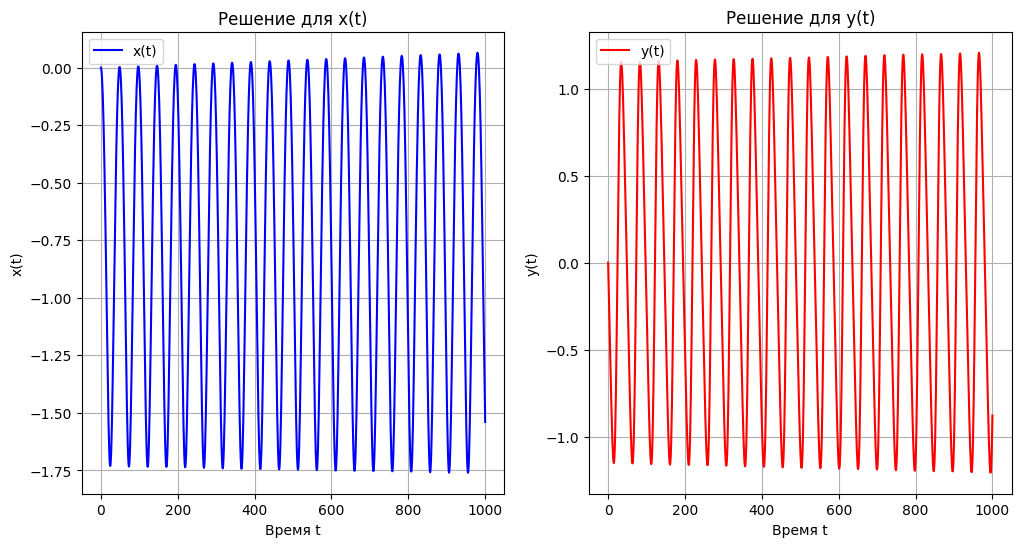

In [60]:
_, yks = runge_kutta_2(0, 0, h)

plot(_, yks)

In [33]:
# 1 порядок


def runge_kutta_1(x_n, y_n, h):
    yks = np.array([], dtype = float)
    xks = np.array([], dtype = float)


    yks = np.append(yks, y_n)
    xks = np.append(xks, x_n)

    for n in range(steps):
        k_1 = h * y_n
        l_1 = h * (x_n*x_n - 1)


        x_n = x_n + k_1
        y_n = y_n + l_1
        yks = np.append(yks, y_n)
        xks = np.append(xks, x_n)
    return xks, yks



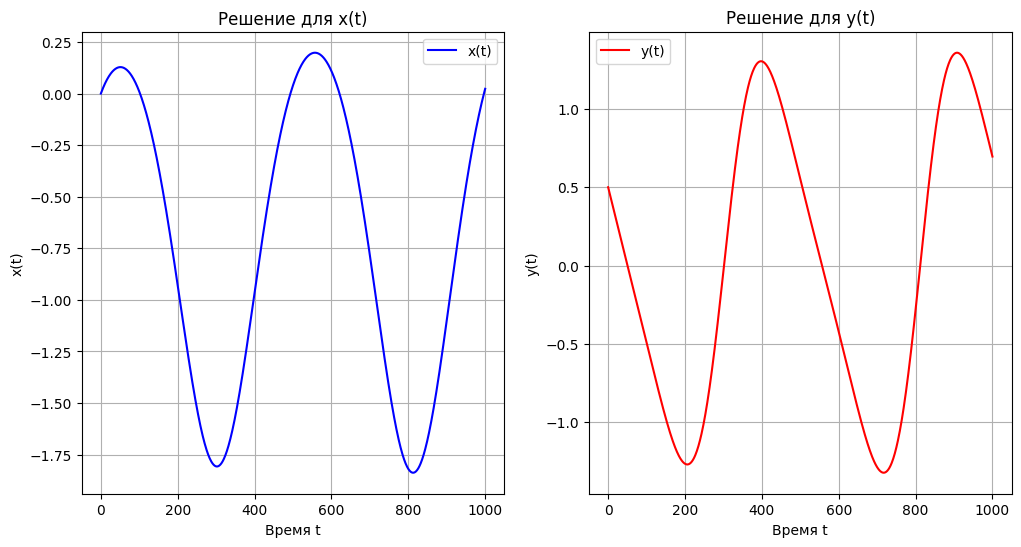

In [34]:
_, yks = runge_kutta_1(0, 0.5, 0.01)

plot(_, yks)

In [77]:

def Adams4(x0, y0, h):
    x_values, y_values = runge_kutta_4(x0, y0, h)
    x_values = x_values[:4]
    y_values = y_values[:4]

    for i in range(4, steps + 1):

        xn, xn_1, xn_2, xn_3 = x_values[-1], x_values[-2], x_values[-3], x_values[-4]
        yn, yn_1, yn_2, yn_3 = y_values[-1], y_values[-2], y_values[-3], y_values[-4]


        x_new = xn + h*(55*f(xn, yn) - 59*f(xn_1, yn_1)
                      + 37*f(xn_2, yn_2) - 9*f(xn_3, yn_3))/24

        y_new = yn + h*(55*g(xn, yn) - 59*g(xn_1, yn_1)
                      + 37*g(xn_2, yn_2) - 9*g(xn_3, yn_3))/24

        x_values = np.append(x_values, x_new)
        y_values = np.append(y_values, y_new)
    return x_values, y_values




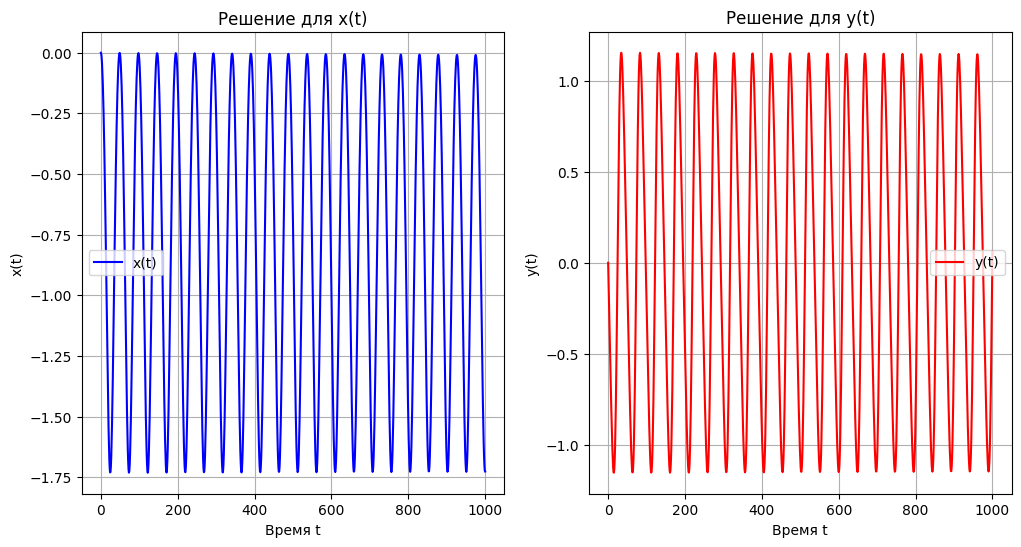

In [78]:
_, yks = Adams4(0, 0, h)

plot(_, yks)

In [75]:

def Adams3(x0, y0, h):
    x_values, y_values = runge_kutta_3(x0, y0, h)
    x_values = x_values[:3]
    y_values = y_values[:3]
    for i in range(3, steps + 1):
        # Используем последние 3 точки
        xn, xn_1, xn_2 = x_values[-1], x_values[-2], x_values[-3]
        yn, yn_1, yn_2 = y_values[-1], y_values[-2], y_values[-3]

        # Вычисляем новые значения
        x_new = xn + h*(23*f(xn, yn) - 16*f(xn_1, yn_1)
                      + 5*f(xn_2, yn_2))/12

        y_new = yn + h*(23*g(xn, yn) - 16*g(xn_1, yn_1)
                      + 5*g( xn_2, yn_2))/12


        x_values = np.append(x_values, x_new)
        y_values = np.append(y_values, y_new)
    return x_values, y_values


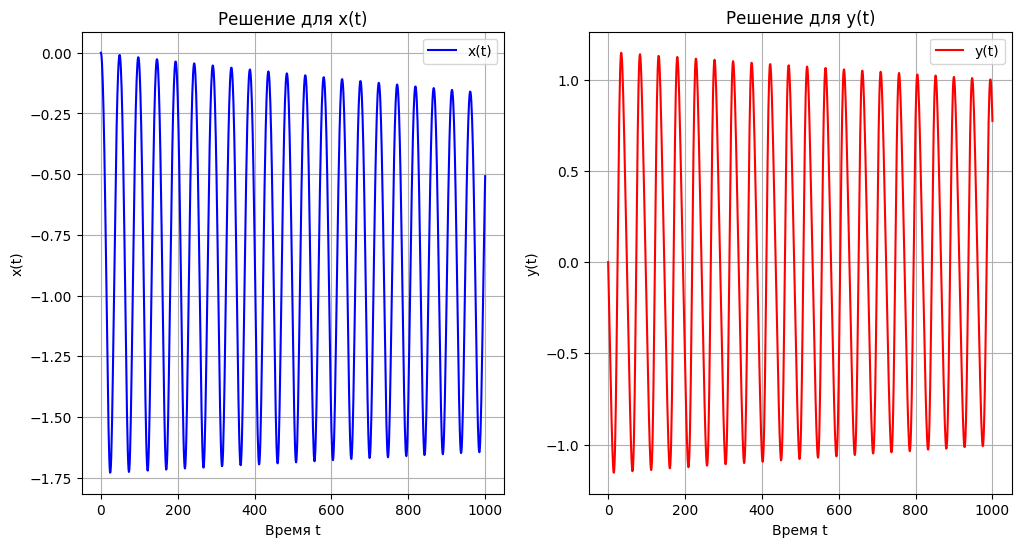

In [76]:
_, yks = Adams3(0, 0, h)

plot(_, yks)

In [73]:
def Adams2(x0, y0, h):
    x_values, y_values = runge_kutta_2(x0, y0, h)
    x_values = x_values[:2]
    y_values = y_values[:2]
    for i in range(2, steps + 1):
        # Используем последние 2 точки
        xn, xn_1 = x_values[-1], x_values[-2]
        yn, yn_1 = y_values[-1], y_values[-2]

        # Формула Адамса-Бэшфорта 2-го порядка
        x_new = xn + h*(3*f(xn, yn) - f(xn_1, yn_1))/2
        y_new = yn + h*(3*g(xn, yn) - g( xn_1, yn_1))/2


        x_values = np.append(x_values, x_new)
        y_values = np.append(y_values, y_new)
    return x_values, y_values


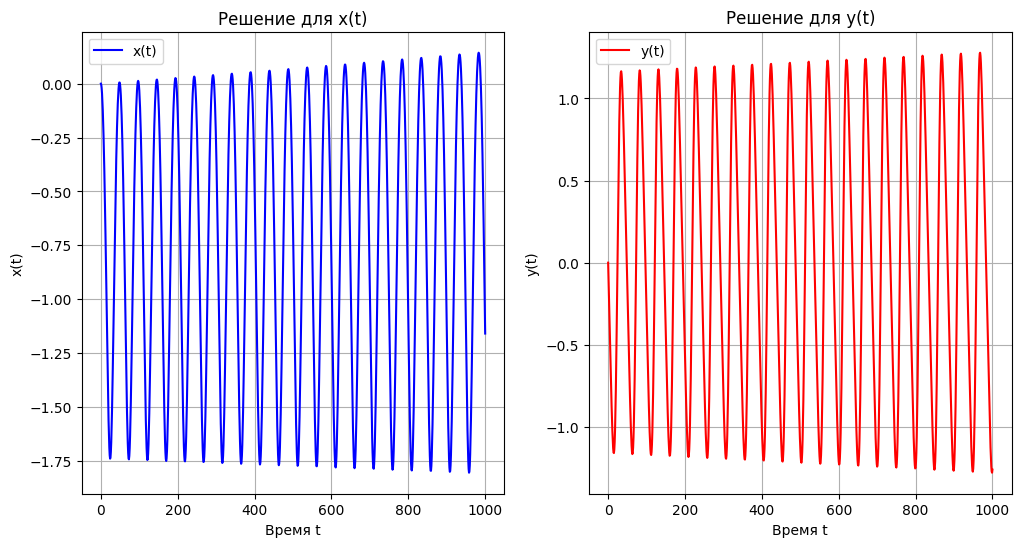

In [74]:
_, yks = Adams2(0, 0, h)

plot(_, yks)

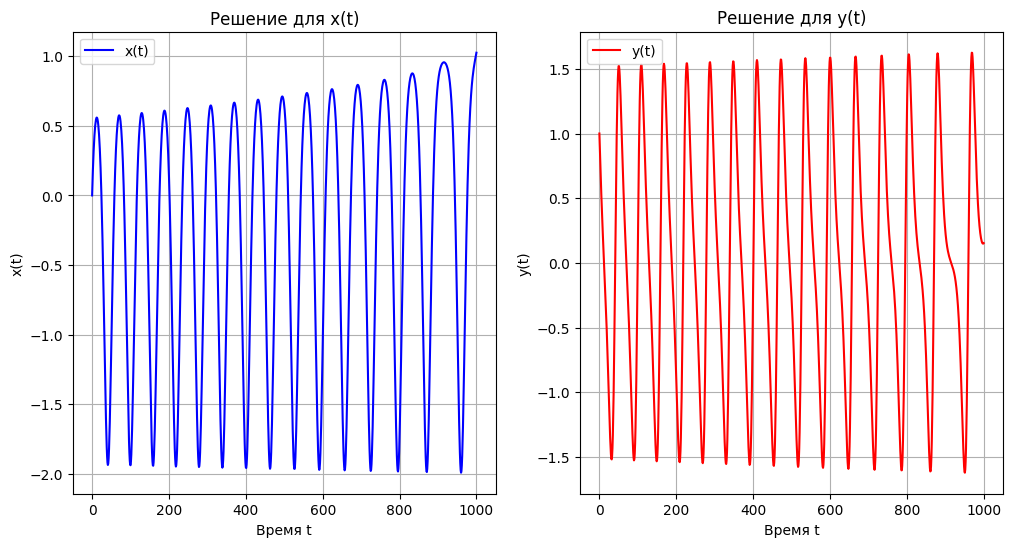

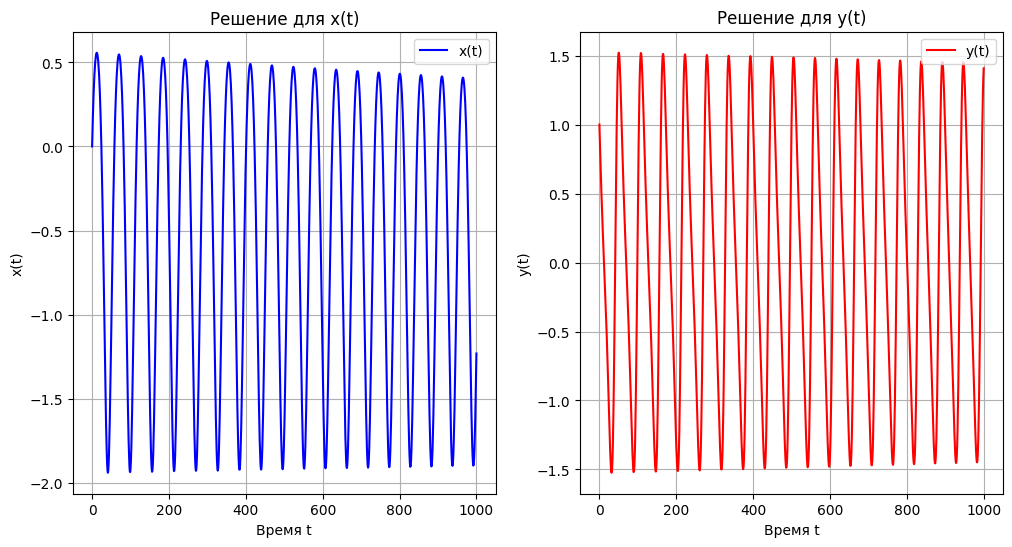

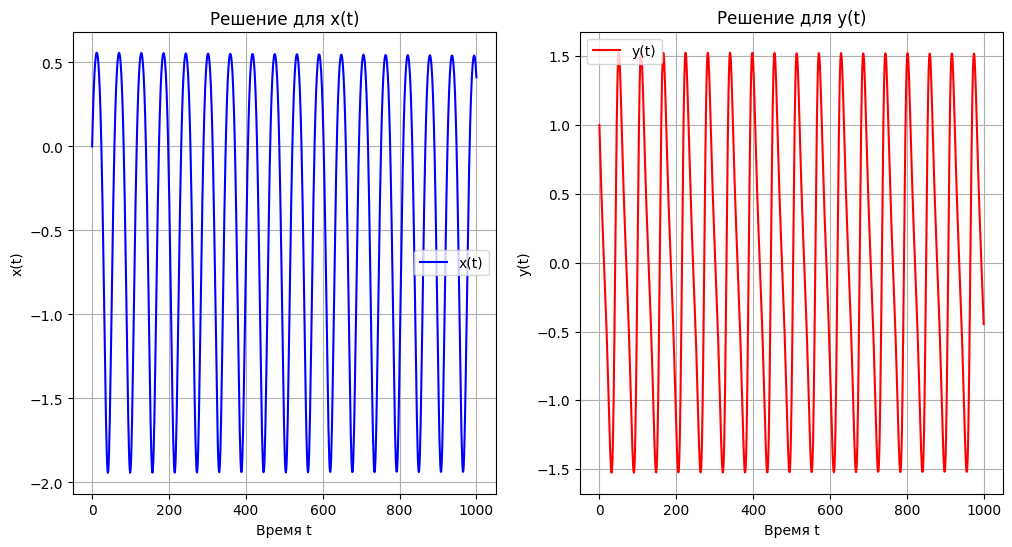

In [5]:

x_bdf2 = np.zeros(steps+1)
y_bdf2 = np.zeros(steps+1)
x_bdf3 = np.zeros(steps+1)
y_bdf3 = np.zeros(steps+1)
x_bdf4 = np.zeros(steps+1)
y_bdf4 = np.zeros(steps+1)


x_bdf2[0], x_bdf3[0], x_bdf4[0] = x0, x0, x0
y_bdf2[0], y_bdf3[0], y_bdf4[0] = y0, y0, y0


startx, starty = runge_kutta_4(x0, y0, h)

for i in range(1, 4):
    x_bdf2[i], y_bdf2[i] = startx[i], starty[i]
    x_bdf3[i], y_bdf3[i] = x_bdf2[i], y_bdf2[i]
    x_bdf4[i], y_bdf4[i] = x_bdf2[i], y_bdf2[i]







for i in range(2, steps+1):


    x_pred = x_bdf2[i-1] + h * f(x_bdf2[i-1], y_bdf2[i-1])
    y_pred = y_bdf2[i-1] + h * g(x_bdf2[i-1], y_bdf2[i-1])

    x_bdf2[i] = (4/3)*x_bdf2[i-1] - (1/3)*x_bdf2[i-2] + (2*h/3)*f(x_pred, y_pred)
    y_bdf2[i] = (4/3)*y_bdf2[i-1] - (1/3)*y_bdf2[i-2] + (2*h/3)*g(x_pred, y_pred)


for i in range(3, steps+1):

    x_pred = x_bdf3[i-1] + h*(3/2*f(x_bdf3[i-1], y_bdf3[i-1])
                          - 1/2*f(x_bdf3[i-2], y_bdf3[i-2]))
    y_pred = y_bdf3[i-1] + h*(3/2*g(x_bdf3[i-1], y_bdf3[i-1])
                          - 1/2*g(x_bdf3[i-2], y_bdf3[i-2]))

    x_bdf3[i] = (18/11)*x_bdf3[i-1] - (9/11)*x_bdf3[i-2] + (2/11)*x_bdf3[i-3] + (6*h/11)*f(x_pred, y_pred)
    y_bdf3[i] = (18/11)*y_bdf3[i-1] - (9/11)*y_bdf3[i-2] + (2/11)*y_bdf3[i-3] + (6*h/11)*g(x_pred, y_pred)


for i in range(4, steps+1):


    x_pred = x_bdf4[i-1] + h*(23/12*f(x_bdf4[i-1], y_bdf4[i-1])
                            - 16/12*f(x_bdf4[i-2], y_bdf4[i-2])
                            + 5/12*f(x_bdf4[i-3], y_bdf4[i-3]))
    y_pred = y_bdf4[i-1] + h*(23/12*g(x_bdf4[i-1], y_bdf4[i-1])
                            - 16/12*g(x_bdf4[i-2], y_bdf4[i-2])
                            + 5/12*g(x_bdf4[i-3], y_bdf4[i-3]))


    x_bdf4[i] = (48/25)*x_bdf4[i-1] - (36/25)*x_bdf4[i-2] + (16/25)*x_bdf4[i-3] - (3/25)*x_bdf4[i-4] + (12*h/25)*f(x_pred, y_pred)
    y_bdf4[i] = (48/25)*y_bdf4[i-1] - (36/25)*y_bdf4[i-2] + (16/25)*y_bdf4[i-3] - (3/25)*y_bdf4[i-4] + (12*h/25)*g(x_pred, y_pred)


plot(x_bdf2, y_bdf2)
plot(x_bdf3, y_bdf3)
plot(x_bdf4, y_bdf4)